## Data Analytics and Visualization

We will use seaborn library which is built on top of the matplotlib.

Data: American census data

In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the census data

census_data = pd.read_csv("http://bit.ly/census-data-wkshp")

#to look at the top 5 records of the data

census_data.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
census_data.shape

(32561, 14)

In [4]:
#To see if there are missings in the data

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income_bracket  32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


/tmp/ipykernel_3814/4266921110.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = census_data.corr() #this calculates the correlation between each numeric variable


<AxesSubplot: >

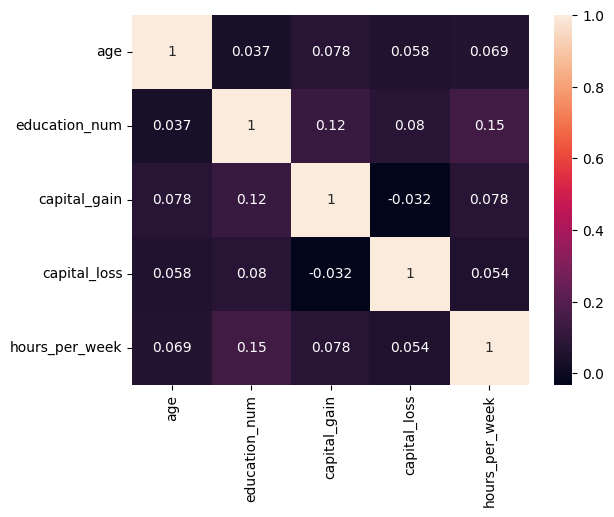

In [5]:
#Correlation analysis using a heat map

correl = census_data.corr() #this calculates the correlation between each numeric variable


#plot a heat map using seaborn library

sns.heatmap(correl, annot = True)

In [6]:
#There is no relationship between the numeric variables that we were able to identify from
#the heatmap

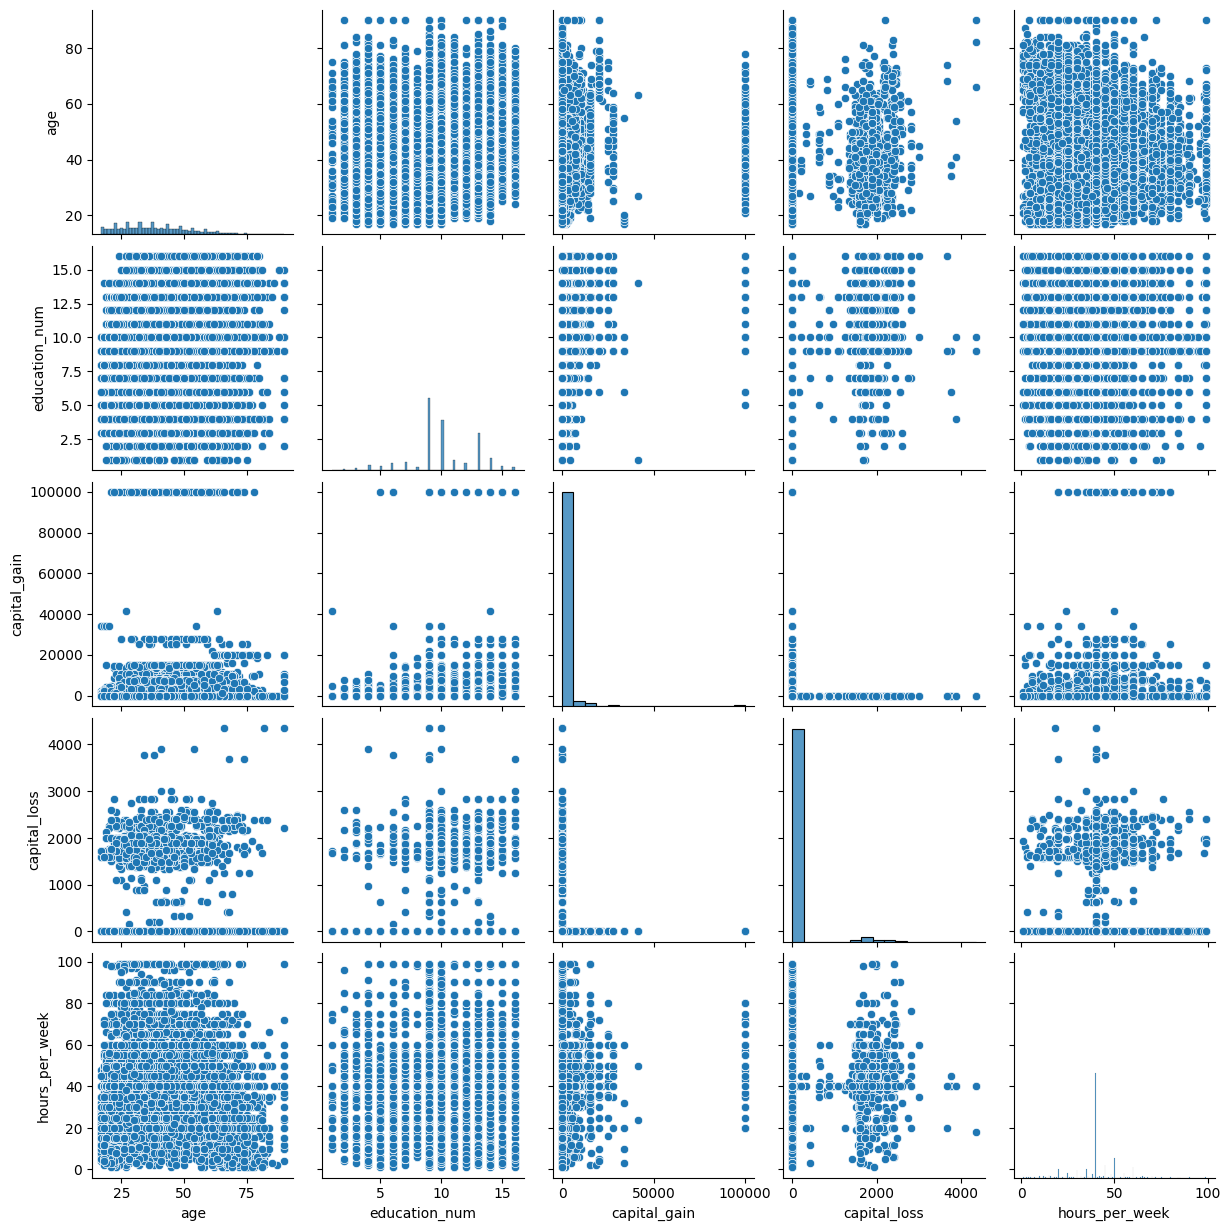

In [7]:
#Let's do a pairplot analysis to see if we can find out anything

sns.pairplot(census_data)

In [8]:
#There was no direct relationships that we were able to identify but got some basic insights:
# The capital gain vs capital loss: capital gain is lesser that capital loss

#even when population is working more the capital gain is lesser

<AxesSubplot: xlabel='capital_loss', ylabel='capital_gain'>

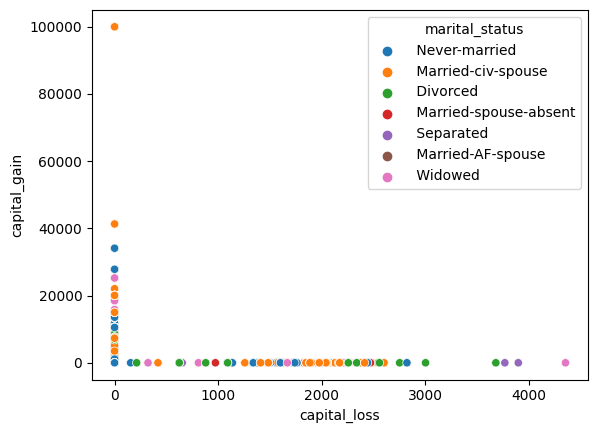

In [9]:
#relationship between capital gain and capital loss

# plt.scatter(capital_gain, capital_loss)

sns.scatterplot(x= 'capital_loss', y='capital_gain', hue = 'marital_status', data=census_data)

In [10]:
#1. capital loss is more than capital gain, the pay might not be upto the mark 
#2. Widowed or Divorced have more capital loss
#3. There are outliers in both the axes

<AxesSubplot: xlabel='capital_loss', ylabel='capital_gain'>

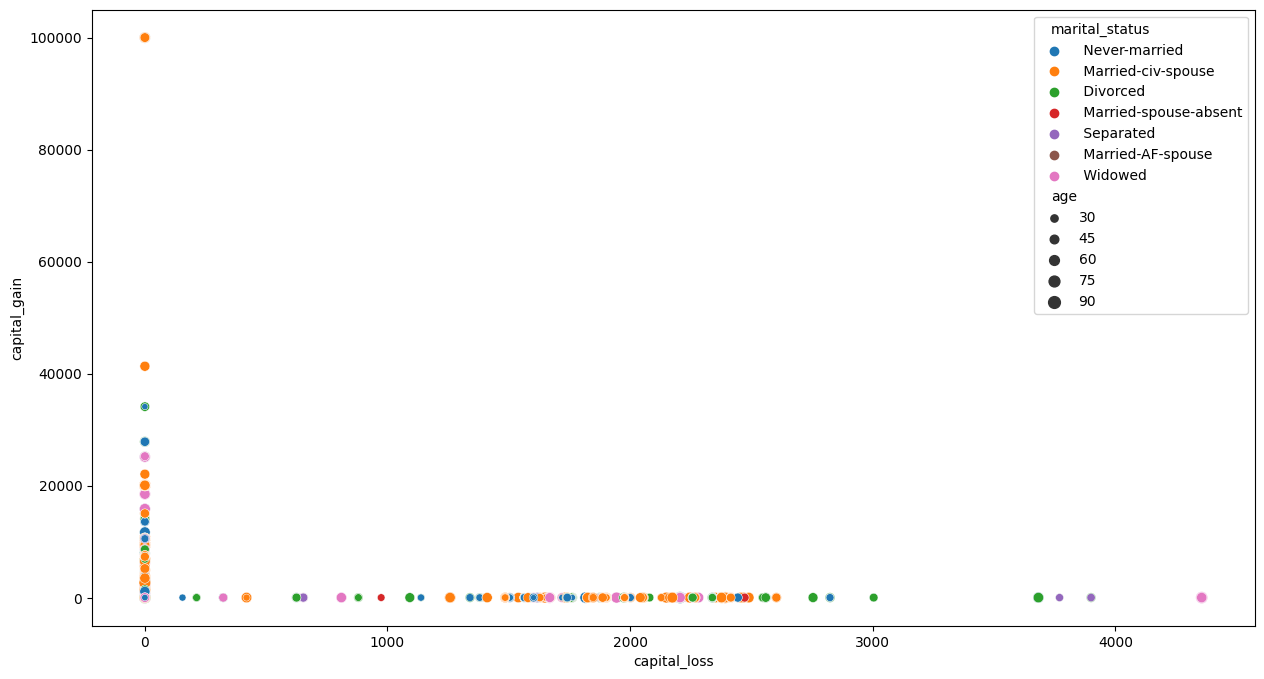

In [11]:
#add age details

plt.figure(figsize = (15, 8))
sns.scatterplot(x= 'capital_loss', y='capital_gain', hue = 'marital_status', size = 'age',
                data=census_data)

In [12]:
#The older the divorced or widowed are the higher the chances of having capital loss

In [13]:
#I want to see the relationship of age vs hours_worked

<AxesSubplot: xlabel='age', ylabel='hours_per_week'>

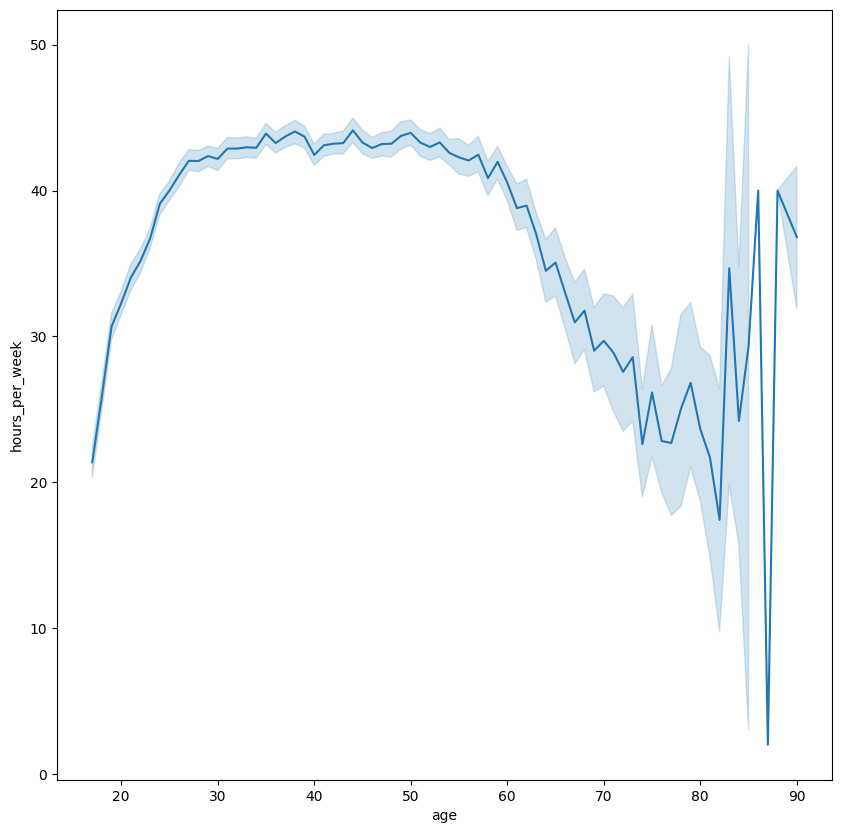

In [14]:
plt.figure(figsize = (10,10))

sns.lineplot(x = 'age', y='hours_per_week', data= census_data)

In [15]:
#1) mid aged people are working more hours
#2) There is an exponential increase in the age of working class from 20 years to 30 years

#3) There is a huge fluctuation in working hours for age above 80 years
#4) The outlier is that people of 90 year age is working more than 40 hours

<AxesSubplot: xlabel='capital_loss', ylabel='capital_gain'>

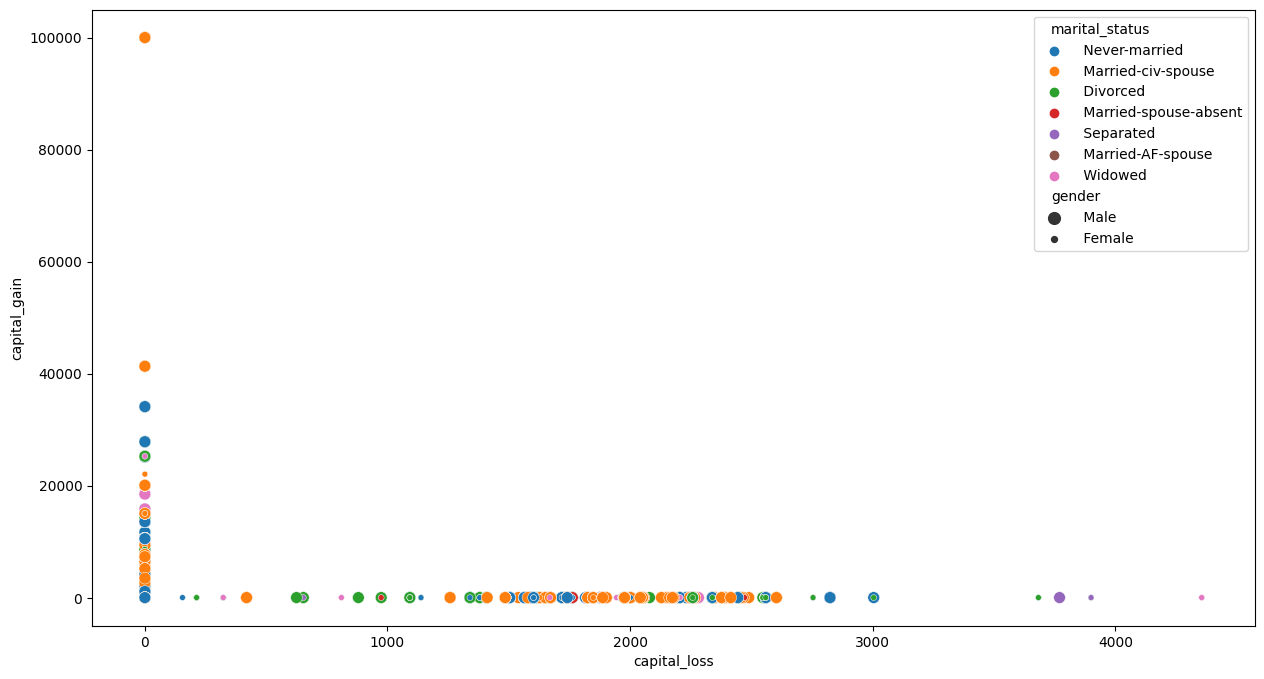

In [16]:
plt.figure(figsize =(15,8))
sns.scatterplot(x= 'capital_loss', y='capital_gain', hue = 'marital_status', size = 'gender',
                data=census_data)

<AxesSubplot: xlabel='age', ylabel='marital_status'>

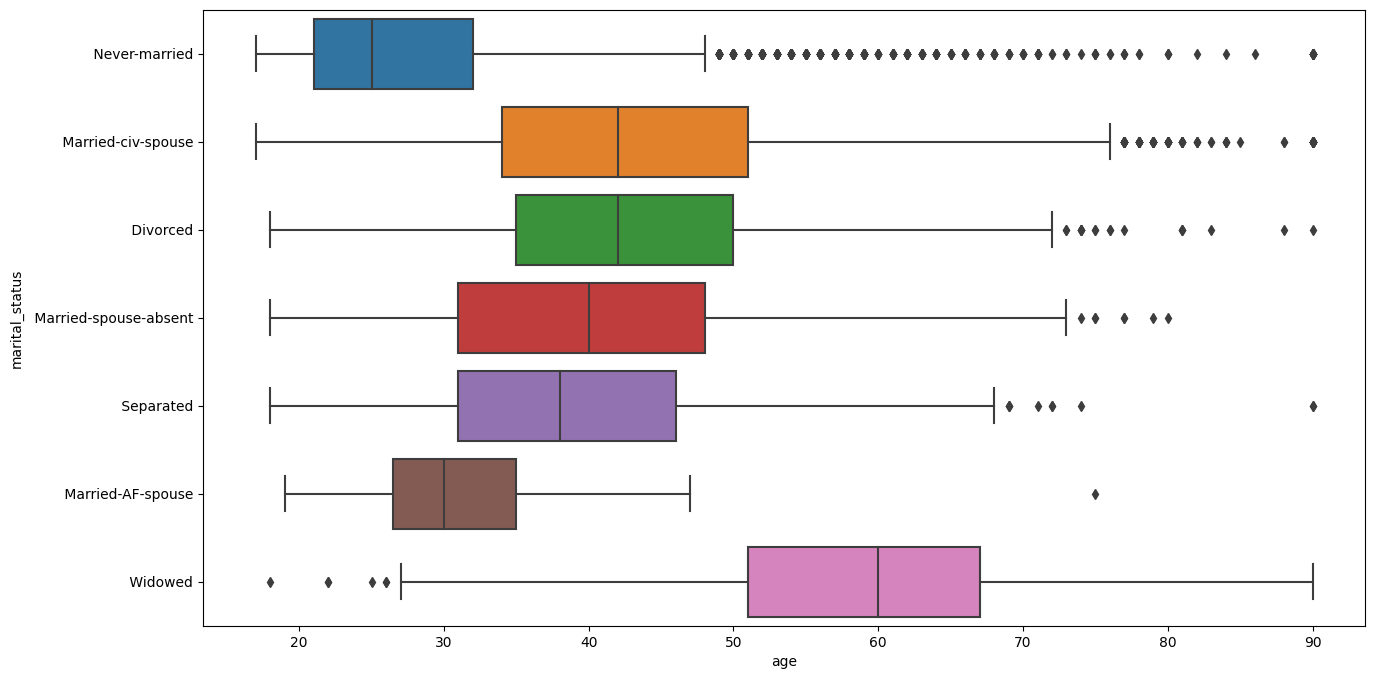

In [17]:
#Distribution of age with respect to marital status

plt.figure(figsize = (15, 8))

sns.boxplot(x = 'age', y='marital_status', data= census_data)

<AxesSubplot: xlabel='age', ylabel='marital_status'>

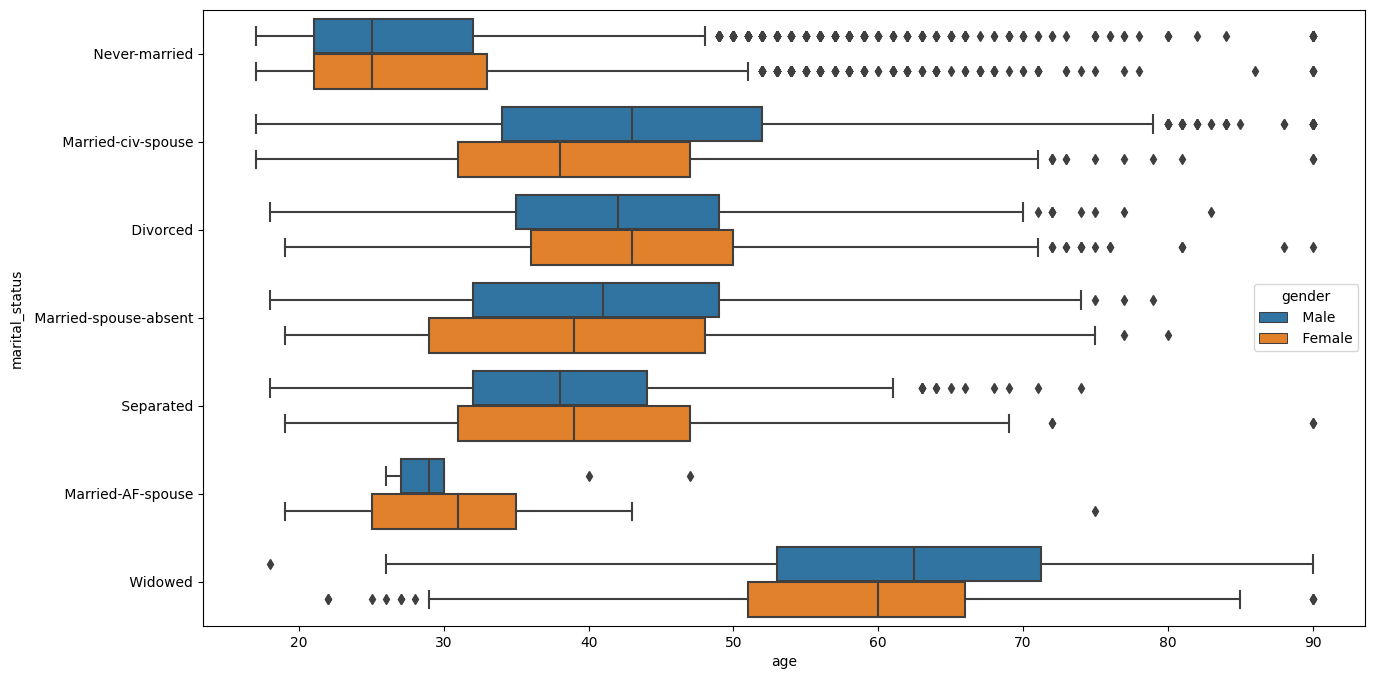

In [18]:
#stratify the above and try to add gender 

plt.figure(figsize = (15, 8))

sns.boxplot(x = 'age', y='marital_status', hue = 'gender', data= census_data)

In [19]:
#1) Women are widowed earlier

#2) The median age of never married for both men and women are same

#3) The spread of males married AF spouse is less

<AxesSubplot: xlabel='income_bracket', ylabel='age'>

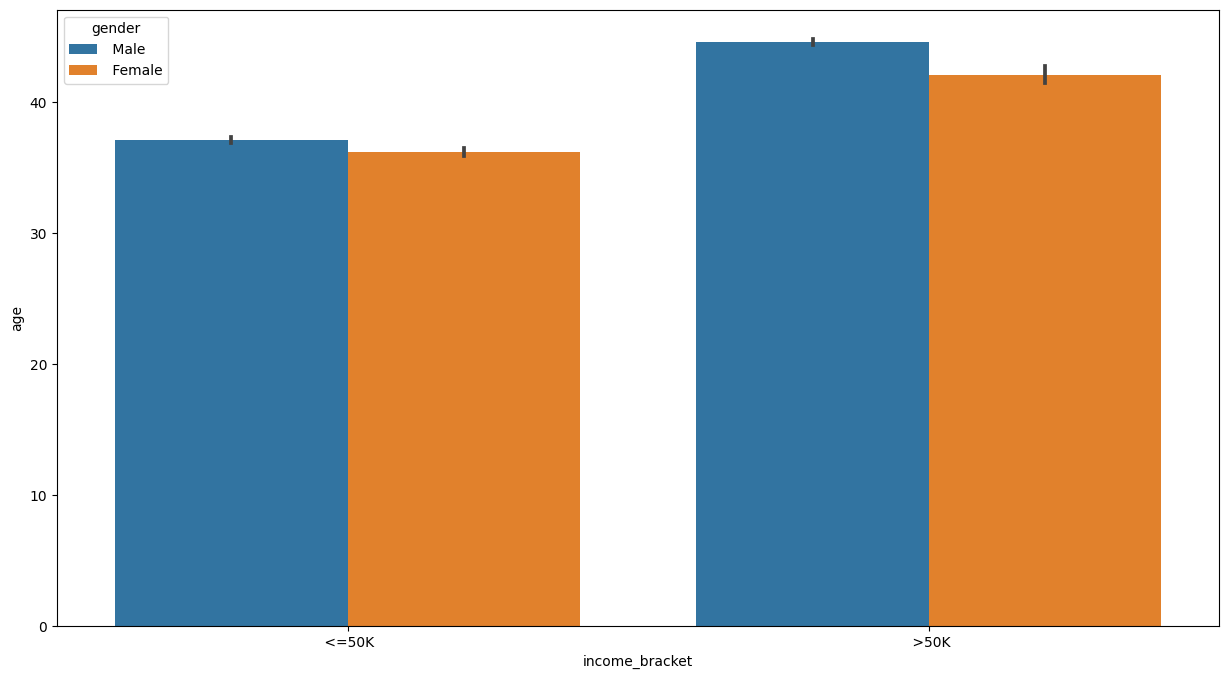

In [20]:
#Let's see income bracket vs age

plt.figure(figsize = (15, 8))

sns.barplot(x = 'income_bracket', y='age', hue = 'gender', data=census_data)

In [21]:
#1) Women are paid less compared to men
#2) With increase in age the pay of women is not increased like for the men

<AxesSubplot: xlabel='marital_status', ylabel='count'>

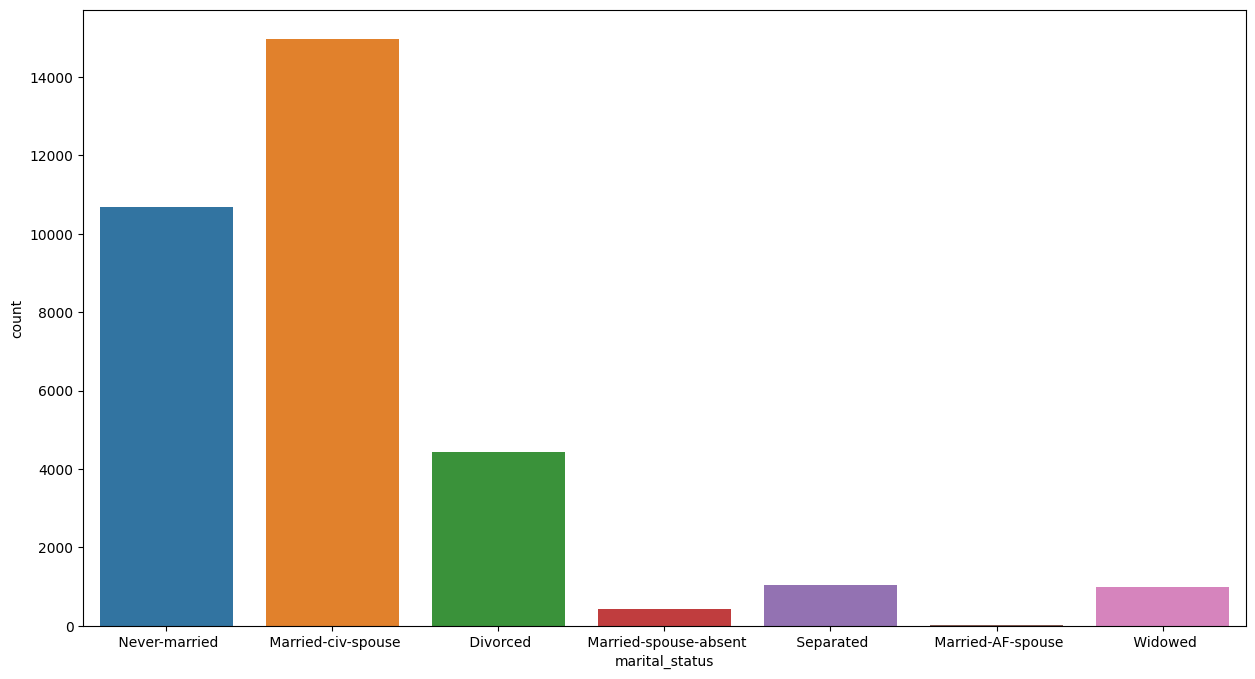

In [22]:
#count of population for marital_status category

plt.figure(figsize = (15,8))

sns.countplot(x ='marital_status', data = census_data)

In [23]:
#1. majority of the population are married to civ spouse
#2. choose to not get married as well

<AxesSubplot: xlabel='income_bracket', ylabel='age'>

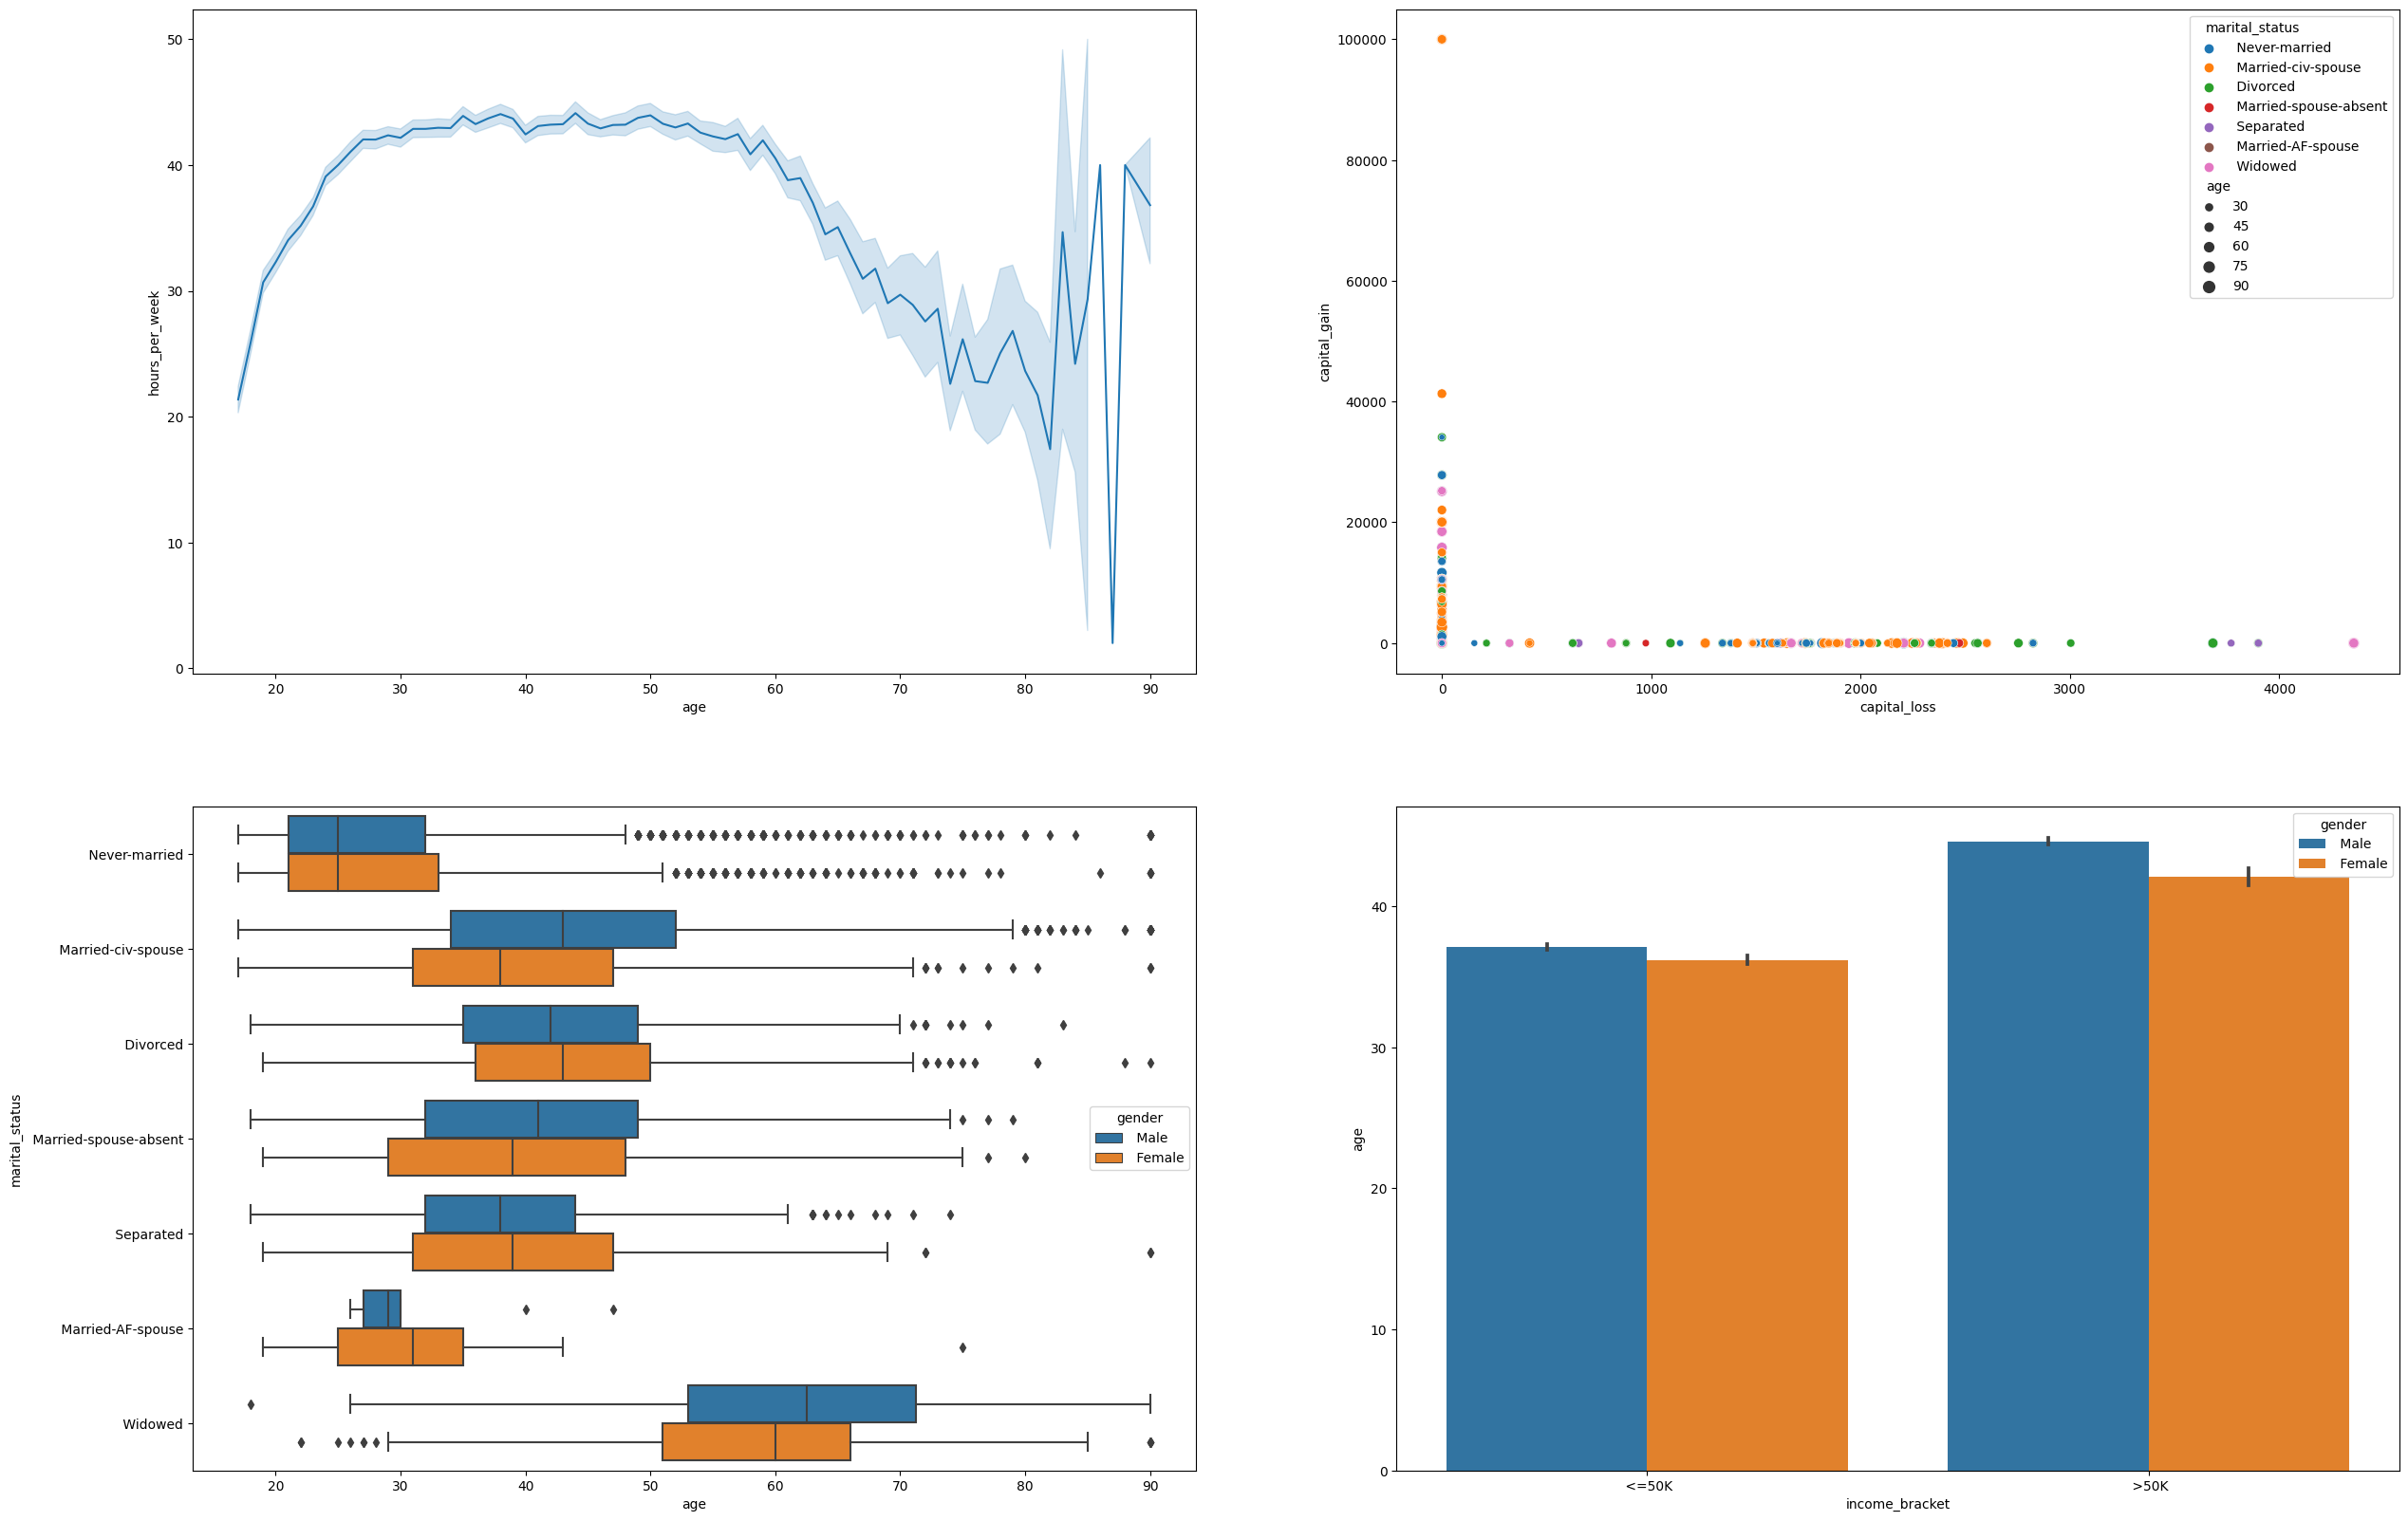

In [24]:
#creating a Dashboard with 4 visuals

fig = plt.figure(figsize = (30,20))

plt.subplot(2, 2, 1)

sns.lineplot(x = 'age', y='hours_per_week', data= census_data)

plt.subplot(2, 2, 2)
sns.scatterplot(x= 'capital_loss', y='capital_gain', hue = 'marital_status', size = 'age',
                data=census_data)

plt.subplot(2, 2, 3)

sns.boxplot(x = 'age', y='marital_status', hue = 'gender', data= census_data)

plt.subplot(2, 2, 4)
sns.barplot(x = 'income_bracket', y='age', hue = 'gender', data=census_data)

In [25]:
fig.savefig('dashboard.png')

In [27]:
import statsmodels.formula.api as sm
result = sm.ols(formula="hours_per_week ~ age", data=census_data).fit()
result.params
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hours_per_week   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     154.6
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.01e-35
Time:                        16:26:59   Log-Likelihood:            -1.2796e+05
No. Observations:               32561   AIC:                         2.559e+05
Df Residuals:                   32559   BIC:                         2.560e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.0362      0.205    185.720      0.000      37.635      38.438
age            0.0622      0.005     12.436      0.000       0.052       0.072
==============================================================================
Omnibus:                     2514.217   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12283.506
Skew:                           0.209   Prob(JB):                         0.00
Kurtosis:                       5.980   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""